# Autoencoders (AEs) en MNIST

## (a)

In [6]:
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D,UpSampling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils
from keras.utils import plot_model
from IPython.display import Image, display, SVG

import h5py
import time
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import binomial
from numpy.random import standard_normal

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE


#datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#numero de epochs debe ir 50
n_epoch=50

 
#normalizacion
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#reduccion matriz 28x28 a un arreglo de largo 784 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)

#datos para validacion
x_vali = x_train[-5000:]
y_vali = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

#Define here your validation set
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_vali = np_utils.to_categorical(y_vali, 10)

#dimensiones de entrada
print ('dimensiones entrada :')
print  ('x_train ', x_train.shape ,', y_train ' ,y_train.shape)
print  ('x_test ', x_test.shape ,', y_test ' ,y_test.shape)
print  ('x_vali ', x_vali.shape ,', y_vali ' ,y_vali.shape)


(60000, 784)
dimensiones entrada :
x_train  (55000, 784) , y_train  (55000,)
x_test  (10000, 784) , y_test  (10000,)
x_vali  (5000, 784) , y_vali  (5000,)


## 3.1 Reduccion de dimensionalidad

## (a)

### modelo con activacion sigmoid

In [20]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import save_model
from keras.optimizers import SGD
from keras.models import model_from_yaml


# modelo con activacion sigmoid
input_img = Input(shape=(784,))
encoded = Dense(32, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if sys.path[0] == '':
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  del sys.path[0]
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  app.launch_new_instance()


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s - loss: 0.2962 - val_loss: 0.2670
Epoch 2/50
55000/55000 [==============================] - 5s - loss: 0.2655 - val_loss: 0.2647
Epoch 3/50
55000/55000 [==============================] - 5s - loss: 0.2642 - val_loss: 0.2640
Epoch 4/50
55000/55000 [==============================] - 5s - loss: 0.2637 - val_loss: 0.2635
Epoch 5/50
55000/55000 [==============================] - 5s - loss: 0.2623 - val_loss: 0.2613
Epoch 6/50
55000/55000 [==============================] - 5s - loss: 0.2592 - val_loss: 0.2572
Epoch 7/50
55000/55000 [==============================] - 5s - loss: 0.2554 - val_loss: 0.2539
Epoch 8/50
55000/55000 [==============================] - 6s - loss: 0.2526 - val_loss: 0.2513
Epoch 9/50
55000/55000 [==============================] - 6s - loss: 0.2502 - val_loss: 0.2492
Epoch 10/50
55000/55000 [==============================] - 6s - loss: 0.2480 - val_loss: 0.2469


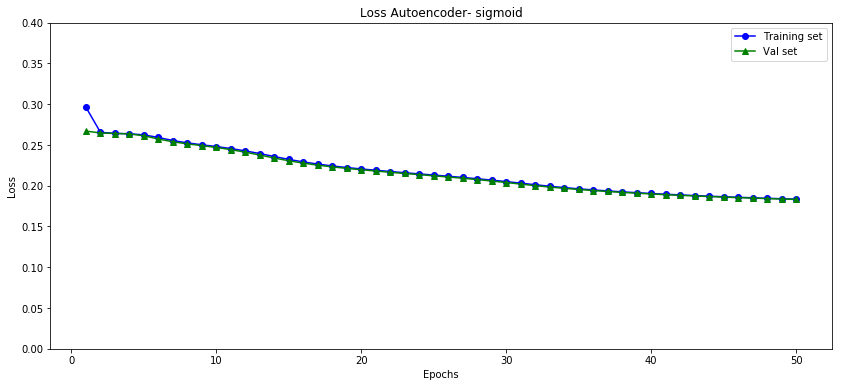

In [21]:
import h5py

autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
result=autoencoder.fit(x_train,x_train,nb_epoch=n_epoch,batch_size=25,shuffle=True,validation_data=(x_vali, x_vali))
results= result.history

autoencoder.save('basic_autoencoder_784x32sigmoid.h5')

loss_values1 = results['loss']
val_loss_values1 = results['val_loss']
epochs1 = range(1, len(loss_values1) + 1)
f, axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(epochs1, loss_values1, 'bo-', label = "Training set")
axarr.plot(epochs1, val_loss_values1, 'g^-',label = "Val set")
axarr.set_title('Loss Autoencoder- sigmoid')
axarr.set_ylim(0,0.4)
axarr.set_xlabel('Epochs')
axarr.set_ylabel('Loss')
axarr.legend(loc="upper right", fancybox= True)
plt.show()


### modelo con activacion relu

In [ ]:
# modelo con activacion relu
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s - loss: 0.2226 - val_loss: 0.1700
Epoch 2/50
55000/55000 [==============================] - 5s - loss: 0.1531 - val_loss: 0.1389
Epoch 3/50
55000/55000 [==============================] - 5s - loss: 0.1299 - val_loss: 0.1224
Epoch 4/50
55000/55000 [==============================] - 5s - loss: 0.1172 - val_loss: 0.1135
Epoch 5/50
55000/55000 [==============================] - 5s - loss: 0.1106 - val_loss: 0.1088
Epoch 6/50
55000/55000 [==============================] - 5s - loss: 0.1070 - val_loss: 0.1061
Epoch 7/50
55000/55000 [==============================] - 5s - loss: 0.1048 - val_loss: 0.1046
Epoch 8/50
55000/55000 [==============================] - 5s - loss: 0.1034 - val_loss: 0.1032
Epoch 9/50
55000/55000 [==============================] - 5s - loss: 0.1024 - val_loss: 0.1024
Epoch 10/50
55000/55000 [==============================] - 5s - loss: 0.1016 - val_loss: 0.1016


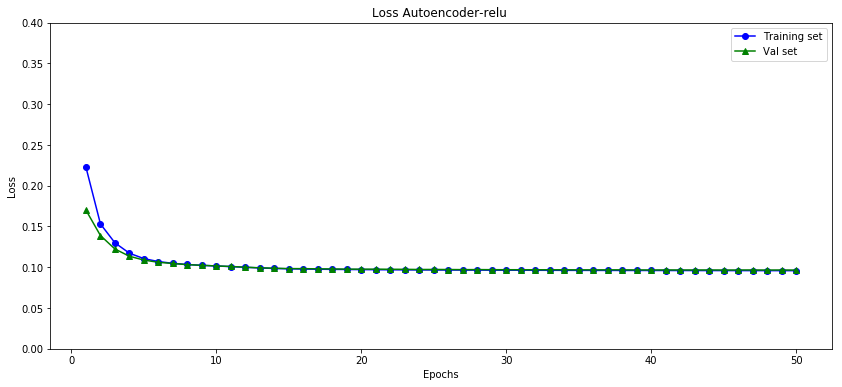

In [12]:

autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
results2 = autoencoder.fit(x_train,x_train,nb_epoch=n_epoch,batch_size=25,shuffle=True,validation_data=(x_vali, x_vali))
results= results2.history

autoencoder.save('basic_autoencoder_784x32relu.h5')

loss_values1 = results['loss']
val_loss_values1 = results['val_loss']
epochs1 = range(1, len(loss_values1) + 1)
f, axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(epochs1, loss_values1, 'bo-', label = "Training set")
axarr.plot(epochs1, val_loss_values1, 'g^-',label = "Val set")
axarr.set_title('Loss Autoencoder-relu ')
axarr.set_ylim(0,0.4)
axarr.set_xlabel('Epochs')
axarr.set_ylabel('Loss')
axarr.legend(loc="upper right", fancybox= True)
plt.show()



se usa, binary_crossentropy como funcion de perdida, devido a que cada pixcel es independiente, es por ello que es valido usar esta fucion de perdida.

Comparacion con funciones de activacion relu y sigmoid

![Sin titulo](imagenes/sigmoid.png)
![Sin titulo](imagenes/relu.png)

podemos ver la diferencia en la forma mucho mas rapida que converge relu, y que llega a mejores valores que sigmoid.  


In [13]:
#reduccion de dimensiones
dim = [2,8,32,64]
resultsdi= []

In [14]:
for di in dim:
    input_img = Input(shape=(784,))
    encoded = Dense(di, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(di,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    results = autoencoder.fit(x_train,x_train,epochs=n_epoch,batch_size=32,shuffle=True, validation_data=(x_vali, x_vali))
    resultsdi.append(results)
    autoencoder.save('basic_autoencoder_784x'+str(di)+'relu.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 4s - loss: 0.2819 - val_loss: 0.2525
Epoch 2/50
55000/55000 [==============================] - 4s - loss: 0.2510 - val_loss: 0.2482
Epoch 3/50
55000/55000 [==============================] - 4s - loss: 0.2480 - val_loss: 0.2459
Epoch 4/50
55000/55000 [==============================] - 4s - loss: 0.2457 - val_loss: 0.2445
Epoch 5/50
55000/55000 [==============================] - 4s - loss: 0.2438 - val_loss: 0.2418
Epoch 6/50
55000/55000 [==============================] - 4s - loss: 0.2420 - val_loss: 0.2403
Epoch 7/50
55000/55000 [==============================] - 4s - loss: 0.2404 - val_loss: 0.2389
Epoch 8/50
55000/55000 [==============================] - 4s - loss: 0.2392 - val_loss: 0.2378
Epoch 9/50
55000/55000 [==============================] - 4s - loss: 0.2384 - val_loss: 0.2370
Epoch 10/50
55000/55000 [==============================] - 4s - loss: 0.2376 - val_loss: 0.2364


55000/55000 [==============================] - 4s - loss: 0.0791 - val_loss: 0.0797
Epoch 20/50
55000/55000 [==============================] - 4s - loss: 0.0787 - val_loss: 0.0793
Epoch 21/50
55000/55000 [==============================] - 4s - loss: 0.0784 - val_loss: 0.0789
Epoch 22/50
55000/55000 [==============================] - 4s - loss: 0.0780 - val_loss: 0.0786
Epoch 23/50
55000/55000 [==============================] - 4s - loss: 0.0777 - val_loss: 0.0784
Epoch 24/50
55000/55000 [==============================] - 4s - loss: 0.0775 - val_loss: 0.0781
Epoch 25/50
55000/55000 [==============================] - 4s - loss: 0.0772 - val_loss: 0.0779
Epoch 26/50
55000/55000 [==============================] - 4s - loss: 0.0770 - val_loss: 0.0777
Epoch 27/50
55000/55000 [==============================] - 4s - loss: 0.0768 - val_loss: 0.0775
Epoch 28/50
55000/55000 [==============================] - 4s - loss: 0.0766 - val_loss: 0.0774
Epoch 29/50
55000/55000 [===========================

f, axarr = plt.subplots(1,figsize=(14,6))
colores = ['b','r','g','k']

for histori,col,d in zip(resultsdi,colores,dim): #para cada dimension
    
    hist = histori.history
    #loss_values1 = hist['loss']
    val_loss_values1 = hist['val_loss']
    epochs1 = range(1, len(val_loss_values1) + 1)

    #axarr.plot(epochs1, loss_values1, col+'o-', label = "Training set, dimensiones"+str(d))
    axarr.plot(epochs1, val_loss_values1, col+'^-',label = "Val set, dimensiones"+str(d))
    axarr.set_title('Loss Autoencoder d='+str(d))
    axarr.set_ylim(0,0.3)
    axarr.set_xlabel('Epochs')
    axarr.set_ylabel('Loss')
    
    axarr.legend(loc="upper right", fancybox= True)
plt.show()

![Sin titulo](imagenes/dimensiones.png)


Al probar con las distintas dimensiones, podemos ver que en todos los casos se comporta parecido, pero hay una gran diferencia en los valores finales, y se destaca que con 2 dimensiones se logra un valor semejante al uso de sigmoid, luego hay un salto de considerable con 8 dimensiones , donde sin duda es mas notorio el salto de 8 a 64 filtros, recordar que el de 32 obtiene valores muy cercanos al de 64 dimensiones.

## (b)


### relu

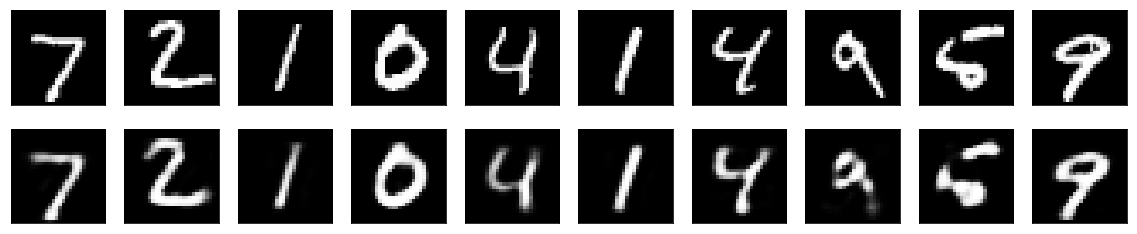

In [22]:
from keras.models import load_model
autoencoder = load_model('basic_autoencoder_784x32relu.h5')
#load other stuff ...

input_img = autoencoder.input
encoder_layer = autoencoder.layers[-2]
encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))  
decoded_shape = Input(shape=(32,))   
decoder_layer = autoencoder.layers[-1] 
decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))
encoded_test = encoder.predict(x_test)
decoded_test = decoder.predict(encoded_test)
import matplotlib
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### sigmoid

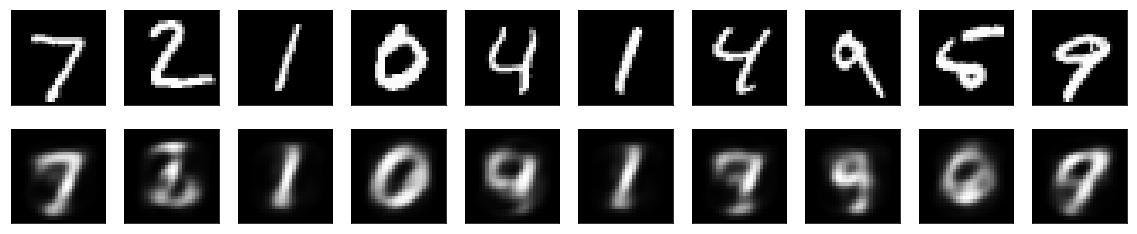

In [24]:
from keras.models import load_model
autoencoder = load_model('basic_autoencoder_784x32sigmoid.h5')


input_img = autoencoder.input
encoder_layer = autoencoder.layers[-2]
encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))

decoded_shape = Input(shape=(32,))   
decoder_layer = autoencoder.layers[-1] 
decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))


encoded_test = encoder.predict(x_test)
decoded_test = decoder.predict(encoded_test)
import matplotlib
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

podemos ver que claramente con sigmoid se ve mucho peor que con relu, usando en ambos 32 dimensiones.

diemension :  2


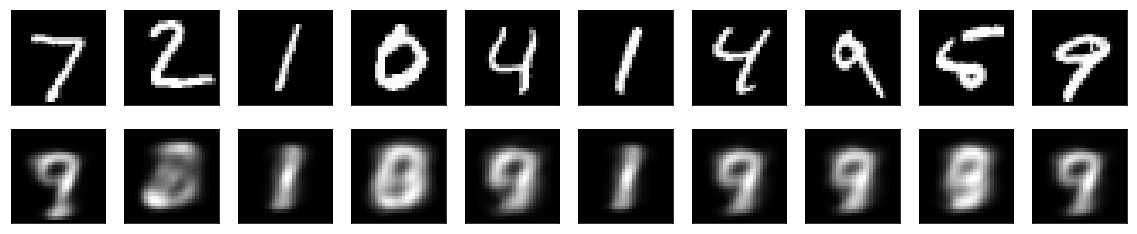

diemension :  8


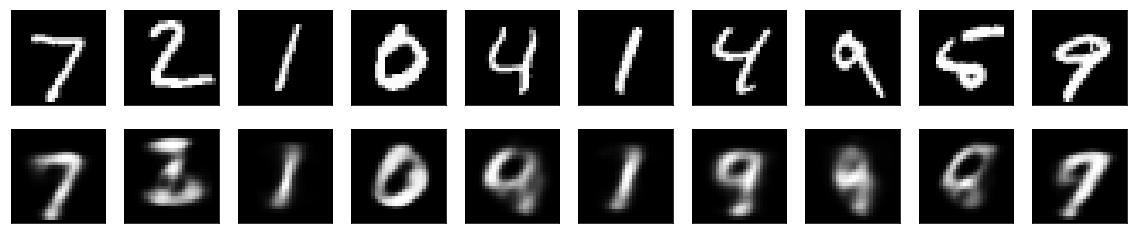

diemension :  32


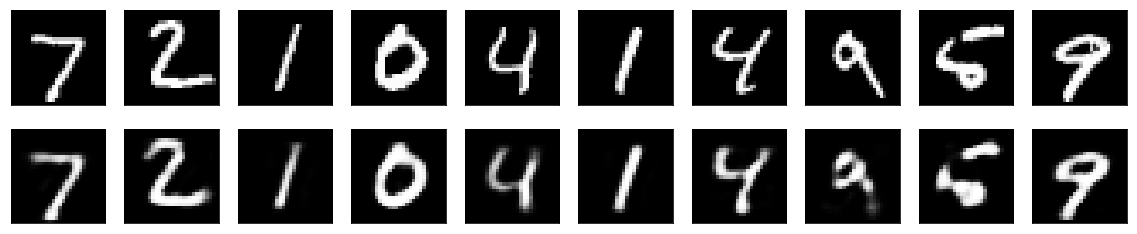

diemension :  64


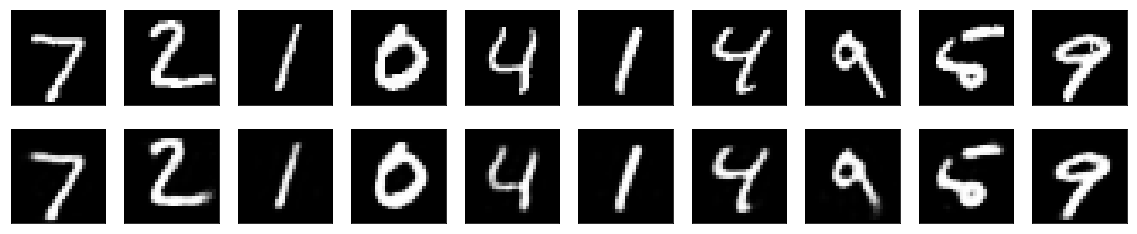

In [26]:
import matplotlib
from keras.models import load_model
for dimensiones in dim :
    print ('diemension : ',dimensiones)
    hdf5 = 'basic_autoencoder_784x'+ str(dimensiones)+'relu.h5'
    autoencoder = load_model(hdf5)
    
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
   
    decoded_shape = Input(shape=(dimensiones,))   
    decoder_layer = autoencoder.layers[-1] 
    decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))

    
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)
    
    
    
    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

podemos ver la gran diferencia entre las distintas dimensiones, como con 2 dimensiones son manchas que se parecen a los numeros, pero luego con 8 dimensiones ya pueden distinguirse numeros, claro que se confunden y la mayoria parece un nueve, pero ya en 32 dimensiones es claramente muy semejante y con 64 son practicamente iguales no se nota diferencia.

In [28]:
start_time = time.time()

dimensiones = [2,8,32,64]
for d in dimensiones:
    print ("Para "+ str(d)+" dimensiones")
    autoencoder = load_model('basic_autoencoder_784x'+str(d)+'relu.h5')
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
    start_time = time.time()
    encoded_test = encoder.predict(x_test)
    encoded_train = encoder.predict(x_train)
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, Y_train)
    print ('Classification Accuracy %.2f' % clf.score(encoded_test,Y_test))
    print("--- %s seconds ---" % (time.time() - start_time))

Para 2 dimensiones
Classification Accuracy 0.23
--- 1.4716014862060547 seconds ---
Para 8 dimensiones
Classification Accuracy 0.86
--- 2.265573024749756 seconds ---
Para 32 dimensiones
Classification Accuracy 0.96
--- 34.882014751434326 seconds ---
Para 64 dimensiones
Classification Accuracy 0.95
--- 78.78833556175232 seconds ---


podemos ver que con solo 2 dimensiones el accuracy es muy bajo y no seria muy util, pero luego con 8 dimensiones mejora radicalmente y ya en 32 y 64 dimensiones son in mejorables, se destaca que empeora con 64 dimensiones, claro que en un muy bajo porcentaje que se puede explicar por falta de entrenamiento, con mas datos tendria que mejorar, y el tiempo crece al doble.

## (d)

In [29]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components=32)
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)
clf = KNeighborsClassifier(10)
clf.fit(pca_train, y_train)
print( 'PCA SCORE %.2f' % clf.score(pca_test,y_test))

PCA SCORE 0.97
